# Q.) Salary_hike -> Build a prediction model for Salary_hike-

# import dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 


In [2]:
df=pd.read_csv(r"C:\Users\ABC\Downloads\Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


from above information we have no null values

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

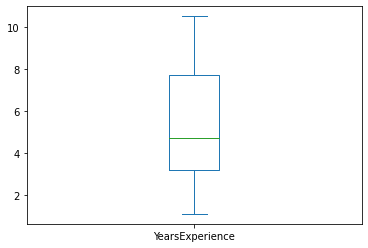

In [6]:
df.YearsExperience.plot(kind='box')

<AxesSubplot:>

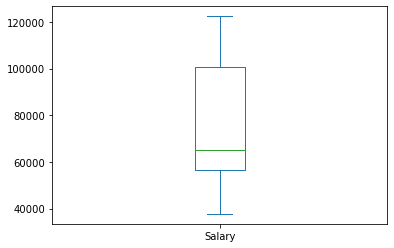

In [7]:
df.Salary.plot(kind='box')

from box plot we can say that there is a posetive skewness in dataset and there are are no outliars present in dataset

# Corelation

In [8]:

df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

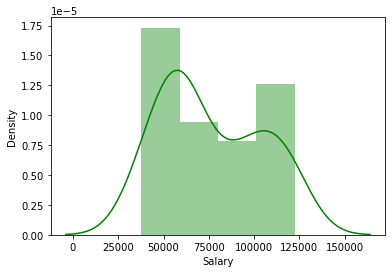

In [9]:
sns.distplot(df['Salary'],color='g')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

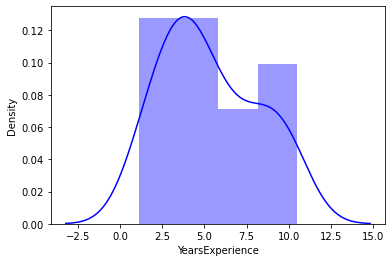

In [10]:
sns.distplot(df['YearsExperience'],color='b')

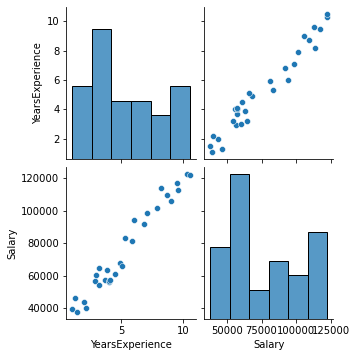

In [11]:
sns.pairplot(df)

from pair plot we can clearly says that as years of experience increses salary also get increases

# by fiting simple ols model we can predict salary on years of experience 

In [12]:
import statsmodels.formula.api as smf 
#dependant variable= ' salary ' , independant variable = ' years of experience'

model=smf.ols("Salary~YearsExperience",data=df).fit()

# Coefficients

In [13]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# as per equation, y = mx+c , we get intercept (c) = 25792.20 and slope (m)= 9449.96, hence we can easily find the y as target value for given value of x or independant variable 

In [14]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

R-Squared value(lie between 0-1) of 0.956 would indicate that 95.60 % of the variance of the dependent variable being studied
is explained by the variance of the independent variable.

# we use regplot to plot data and get a best fit line with minimum residual error. 

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

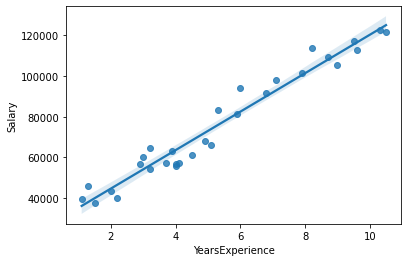

In [15]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

# by regplot we clearly identifies the posetive relation between dependant and independant variable and best fit line captures maximum points .This bestfit line helps to predict target class for given independant variables by plottting those  on bestfit line. 

t and p values

In [16]:
print(model.pvalues,'/n',model.tvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64 /n Intercept          11.346940
YearsExperience    24.950094
dtype: float64


here p  value = 1.14 *e^-20 which is less than 0.05 it means our x variable is significant for model building and its working good 

In [17]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [18]:
df.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

## now we predict the salary on years of exp. by using our model and then check the accuracy.

In [19]:
# we create a series of independant variavle as test data set 
prediction=pd.Series([12,15,17,20,22,1.3,27.5,3.8,5,6.3,9,2.5,3.2,1.1,4.5])

In [20]:
prediction

0     12.0
1     15.0
2     17.0
3     20.0
4     22.0
5      1.3
6     27.5
7      3.8
8      5.0
9      6.3
10     9.0
11     2.5
12     3.2
13     1.1
14     4.5
dtype: float64

In [21]:
salary_hike=pd.DataFrame(prediction,columns=["YearsExperience"])

In [22]:
salary_hike

,YearsExperience
0,12.0
1,15.0
2,17.0
3,20.0
4,22.0
5,1.3
6,27.5
7,3.8
8,5.0
9,6.3


In [23]:
pred_salary=model.predict(salary_hike)
pred_salary

0     139191.748056
1     167541.635020
2     186441.559663
3     214791.446628
4     233691.371271
5      38077.151217
6     285666.164039
7      61702.057020
8      73042.011806
9      85326.962824
10    110841.861092
11     49417.106002
12     56032.079627
13     36187.158752
14     68317.030645
dtype: float64

In [24]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [25]:
#calculating salary manually by using equation for 12 years of expereince and later check result with model prediction
# y=mx+c
salary= 9449.96*12+25792.20
salary 

139191.72

In [26]:
salary_hike['Salary_predicted']=pred_salary
salary_hike

,YearsExperience,Salary_predicted
0,12.0,139191.748056
1,15.0,167541.635020
2,17.0,186441.559663
3,20.0,214791.446628
4,22.0,233691.371271
5,1.3,38077.151217
6,27.5,285666.164039
7,3.8,61702.057020
8,5.0,73042.011806
9,6.3,85326.962824


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary_predicted'>

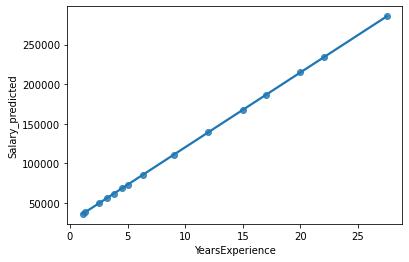

In [27]:
sns.regplot(x='YearsExperience',y='Salary_predicted',data=salary_hike)

# reg plot clearly showing that our model is working  good. As per best fit line on years of experience its showing salary proportional to it. 

# Q.) Delivery_time -> Predict delivery time using sorting time 

In [28]:
df_1=pd.read_csv(r"C:\Users\ABC\Downloads\delivery_time.csv")

In [29]:
df_1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


no null values in above dataset 

In [31]:
df_1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

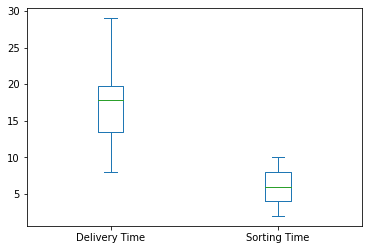

In [32]:
df_1.plot(kind='box')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

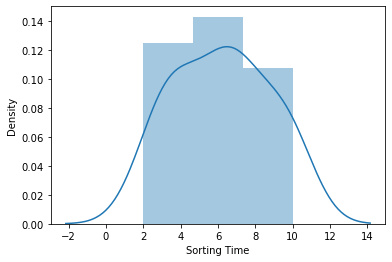

In [33]:
sns.distplot(df_1['Sorting Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

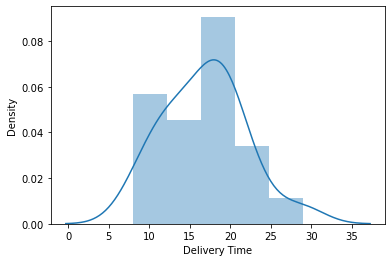

In [34]:
sns.distplot(df_1['Delivery Time'])

# CORELATION

In [35]:
#checking in which amount variables are co related
df_1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [36]:
df_1.rename(columns={'Sorting Time':'Sorting_Time','Delivery Time':'Delivery_Time'},inplace=True)


In [37]:
df_1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


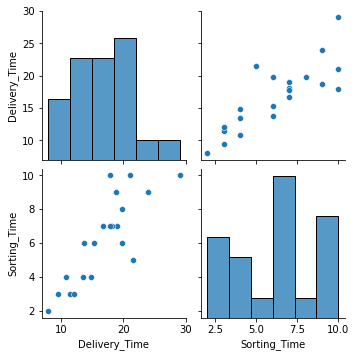

In [38]:
sns.pairplot(data=df_1)

by pairplot we seen that there is a posetive linear relationship between delivery time and sorting time

# by using simple ols model we can predict delivery time  on sorting time  


In [39]:
import statsmodels.formula.api as smf

In [40]:
#dependant variable= ' Delivery_time' , independant variable = ' Sorting_time '
model_2=smf.ols("Delivery_Time~Sorting_Time",data=df_1).fit()

# COEFFICIENTS

In [41]:
model_2.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [42]:
# from params we get slope(m) = 1.64 , intercept(c)=6.58

In [43]:
print(model_2.tvalues,model_2.pvalues,'n/')

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64 n/


In [44]:
(model_2.rsquared,model_2.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# here p_value = 0.000004 which is good,r_squared = 0.68 = 68% which is not enough to prove that our model was  good .

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

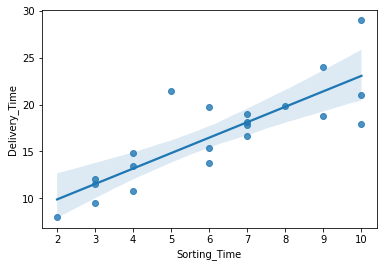

In [45]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=df_1)

# By regplot we seen that datapoints are far away from bestfit line that means we have long spread of data ponts ,we have to treat them and then again check for rsquared value.

In [46]:
import pandas as pd
import seaborn as sns

In [47]:
prediction=pd.Series([12,15,17,20,22])

In [48]:
deliverytime_pred=pd.DataFrame(prediction,columns=["Sorting_Time"])

In [49]:
deliverytime_pred

,Sorting_Time
0,12
1,15
2,17
3,20
4,22


In [50]:
model_2.predict(deliverytime_pred)

0    26.370973
1    31.318032
2    34.616072
3    39.563132
4    42.861172
dtype: float64

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# outliars detection by using cooks distance 

In [52]:
#The instance containing methods to calculate the main influence and outlier measures for the OLS regression.
model_influence=model_2.get_influence()
(c,_)= model_influence.cooks_distance

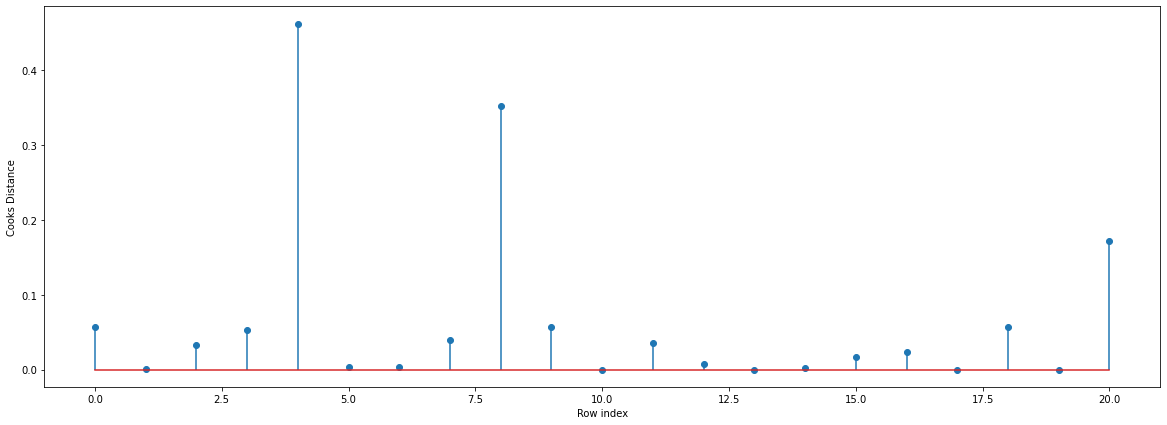

In [53]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

finding max influence point in data sets 

In [54]:
(np.argmax(c),np.max(c))

(4, 0.4620530412650319)

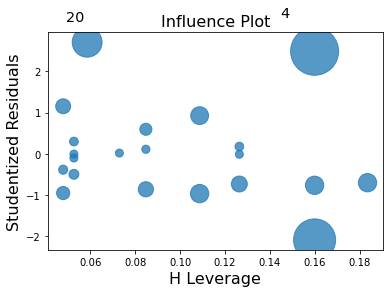

In [55]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_2)
plt.show()

# from influence plot row no. 20,4,8 are having more influence we have to drop them for better result or check after droping them is there  any significance change in rsquared value or not

In [56]:
k = df_1.shape[1]
n = df_1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [57]:
leverage_cutoff

0.42857142857142855

In [58]:
#leverage_cutoff value tells us that value  above 0.42 cooks distance having more  influence in data.

In [59]:
df_1[df_1.index.isin([4,8,20])]


,Delivery_Time,Sorting_Time
4,29.0,10
8,17.9,10
20,21.5,5


In [60]:
df_1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [61]:
imp_model=pd.read_csv(r"C:\Users\ABC\Downloads\delivery_time.csv")

In [62]:
#dropping row 4, 8 , 20 
improved_model=imp_model.drop(imp_model.index[[4,8,20]],axis=0).reset_index()

In [63]:
improved_model.head()

,index,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6


In [64]:
improved_model.rename(columns={'Sorting Time':'Sorting_Time','Delivery Time':'Delivery_Time'},inplace=True)


# improved dataset after removing the higher influence points

In [65]:
improved_model.head()

,index,Delivery_Time,Sorting_Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6


In [66]:
final_model=smf.ols("Delivery_Time~Sorting_Time",data=improved_model).fit()

# coefficients

In [67]:
final_model.params

Intercept       6.024001
Sorting_Time    1.674076
dtype: float64

# from params we get slope(m) = 1.674 , intercept(c)=6.02

In [68]:
print(final_model.tvalues,final_model.pvalues,'n/')

Intercept       5.126385
Sorting_Time    8.941043
dtype: float64 Intercept       1.015144e-04
Sorting_Time    1.273152e-07
dtype: float64 n/


In [69]:
final_model.rsquared,final_model.rsquared_adj

(0.8332330202945817, 0.822810084062993)

# after droping higher influence points we get higher r squared valued 83% which results good 

In [70]:
prediction_final=pd.Series([18,18.9,22,24,24,31,33.5,13.45,17.28,11.8,19.6,16])

In [71]:
deliverytime_pred_final=pd.DataFrame(prediction_final,columns=["Sorting_Time"])

In [72]:
deliverytime_pred_final

,Sorting_Time
0,18.00
1,18.90
2,22.00
3,24.00
4,24.00
5,31.00
6,33.50
7,13.45
8,17.28
9,11.80


In [73]:
predicted_d_time=final_model.predict(deliverytime_pred_final)
predicted_d_time

0     36.157369
1     37.664037
2     42.853673
3     46.201825
4     46.201825
5     57.920357
6     62.105547
7     28.540323
8     34.952034
9     25.778098
10    38.835891
11    32.809217
dtype: float64

In [74]:
deliverytime_pred_final['pred_delivery_time']=predicted_d_time
deliverytime_pred_final

,Sorting_Time,pred_delivery_time
0,18.00,36.157369
1,18.90,37.664037
2,22.00,42.853673
3,24.00,46.201825
4,24.00,46.201825
5,31.00,57.920357
6,33.50,62.105547
7,13.45,28.540323
8,17.28,34.952034
9,11.80,25.778098


In [75]:
#delivery_time_predict= mx+c , using equation 
delivery_time_predict= 1.674*18+6.02

delivery_time_predict

36.152

<AxesSubplot:xlabel='Sorting_Time', ylabel='pred_delivery_time'>

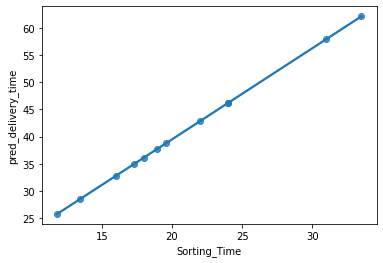

In [76]:
sns.regplot(x='Sorting_Time',y='pred_delivery_time',data=deliverytime_pred_final)

# reg plot clearly showing that our model is working  good. As per best fit line, on sorting time its showing delivery time proportional to it. 